# Исследование надежности заемщиков

## Откроем таблицу и изучим общую информацию о данных

Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`.

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

Выведем первые 20 строчек датафрейма `data` на экран.

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме с помощью метода `info()`.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца. Используем комбинацию двух методов.

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце мы обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.

In [6]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть.

Выведем перечень уникальных значений столбца `children`.

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены. Проверим ещё раз

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.

In [14]:
data['education'] = data['education'].str.lower()

Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


Например, кредитополучателю с доходом 25000 назначим категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используем собственную функцию с именем `categorize_income()` и метод `apply()`.

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

 Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category`  появится строка `'операции с автомобилем'`.

Используем собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучим данные в столбце `purpose` и определим, какие подстроки помогут правильно определить категорию.

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

В правой колонке отображены не просто средние, а вероятность того, что человек просрочит свой кредит
 
 Зависимость определенно есть, однако есть категории, например 5 детей, где просто невозможно сделать корректные выводы, так как выборка, сама по себе, очень мала

 Можно сделать вывод, что с увеличением детей растет количество просроков, следовательно, банку выгоднее давать кредит семьям с меньшим количеством детей

In [27]:
data.groupby('children').agg({'debt':['sum','count','mean']})

debt                 
           sum  count      mean
children                       
0         1063  14091  0.075438
1          444   4808  0.092346
2          194   2052  0.094542
3           27    330  0.081818
4            4     41  0.097561
5            0      9  0.000000

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Зависимость есть: 
 1) Люди, выдедшие из брака посредством различных причин - с большой вероятностью отдадут кредит в срок
 
 2) Люди в браке идут вторым местом в рейтинге "лучшие кредиторы"
 
 3) Самый большой риск - люди не в браке (или вообще не женаты или состоют в гражданском браке)

In [26]:
data.groupby('family_status').agg({'debt':['sum','count','mean']})

debt                 
                       sum  count      mean
family_status                              
Не женат / не замужем  273   2796  0.097639
в разводе               84   1189  0.070648
вдовец / вдова          63    951  0.066246
гражданский брак       385   4134  0.093130
женат / замужем        927  12261  0.075606

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Сложно увидеть зависимость, когда две из пяти выборок - малы

Но если и есть какая-то зависимость, то ,исходя из результатов, можно сделать вывод, что чем ниже заработок - больше вероят задолж

In [25]:
data.groupby('total_income_category').agg({'debt':['sum','count','mean']})

debt                 
                        sum  count      mean
total_income_category                       
A                         2     25  0.080000
B                       354   5014  0.070602
C                      1353  15921  0.084982
D                        21    349  0.060172
E                         2     22  0.090909

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Исходя из результатов можно сделать вывод:

1) Самые "надежные" клиенты - те, кто берет кредит на операции с недвижимостью (думаю это связано с тем, что это чуть ли не первая потребность в жизни каждого человека)

2) После этого идет кредит на свадьбу

3) Самые вероятностно-проблемные клиенты - люди, которые берут кредит на операции с автомобилем  и на получение образования (в принципе логично: данные два фактора являются самыми не необходимыми потребностями по сравнению с другими, описанными выше)

In [28]:
data.groupby('purpose_category').agg({'debt':['sum','count','mean']})

debt                 
                          sum  count      mean
purpose_category                              
операции с автомобилем    400   4279  0.093480
операции с недвижимостью  780  10751  0.072551
получение образования     369   3988  0.092528
проведение свадьбы        183   2313  0.079118

#### 3.5 Приведем возможные причины появления пропусков в исходных данных.

*Ответ: причины могут быть следующие 
1) Технологическая ошибка, то есть ошибка при кпоировании, считывании, смене формата

2) Человечский фактор, возможно, человек не ввел ограничения в ввод данных в поле и люди вводили не то, и из-за разницы в форматах, система "зануляла" данные ввода.*

#### 3.6 Объясним, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.


Начнем с того, что мы заполняли пропуск не просто в количественной метрике, а в денежной метрике, данного типа метрики обычно скошены вправо, следовательно, распределение не симметрично, следовательно, заменив на среднее значение - может быть слишком большое изменение в распределении при замене. То есть ,например , представим ситуацию, что мы все-таки решили использовать среднее значение и у нас есть три "бездельника" отработающие 3 дня (остальные, к примеру, работают усердно), тогда их "экстремальное" значение будет влиять на других очень сильно и среднее значение будет сильно занижено из-за этих трех "бездельников", медиана в свою очередь даст более корректное значение о среднем.

### Шаг 4: общий вывод.

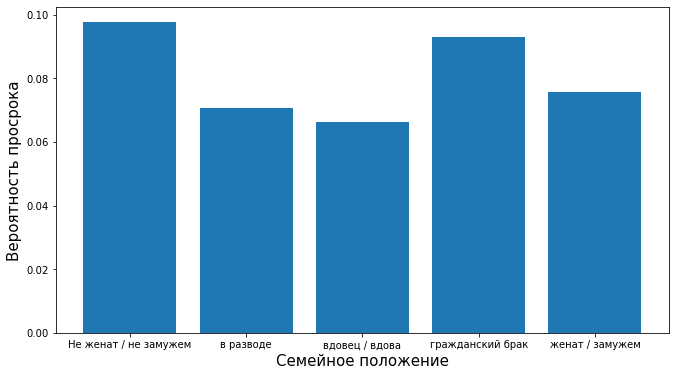

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = ['Не женат / не замужем', 'в разводе','вдовец / вдова', 'гражданский брак', 'женат / замужем']
y = [0.097639,0.070648,  0.066246, 0.093130, 0.075606]
plt.figure(figsize = (11, 6))
plt.bar(x, y)
plt.xlabel('Семейное положение', fontsize = 15)
plt.ylabel('Вероятность просрока', fontsize = 15)
plt.show()

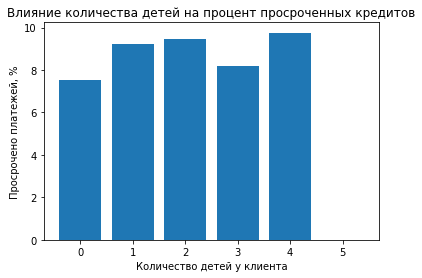

In [31]:
import matplotlib.pyplot as plt

# группируем данные по количеству детей ('children'), затем применяем агрегирующие функции к столбцу 'debt'
grouped_data = data.groupby('children')['debt'].agg(['count', 'mean', 'sum'])
# функция reset_index используется для преобразования индекса в столбец данных
grouped_data.reset_index(inplace=True)
# используем график к таблице, выбираем интересующие нас столбцы (проценты по одной оси и кол-во детей по другой)
plt.bar(grouped_data['children'], grouped_data['mean']*100) # умножаем на 100, чтобы перевести в проценты
# подписываем
plt.title("Влияние количества детей на процент просроченных кредитов")
plt.xlabel("Количество детей у клиента")
plt.ylabel("Просрочено платежей, %")
plt.xticks(grouped_data['children'])
plt.show()



Вывод: 

Нами была проведена работа с данными о платежоспособности клиентов, такими как: кол-во отработанных дней, семейное положение, количество детей и так далее. Мы исследовали как некоторые факторы могут влиять на вероятность возвращения кредита в срок.

Говоря подробнее о каждом факторе, мы сделали следующие выводы:

1) Чем больше детей у заемщика - больше вероятность просрочить кредит

2) Люди, вышедшие из брака посредством различных причин - с большой вероятностью отдадут кредит в срок, после них идут люди, состоящие в браке и самые не надежные заемщики - люди в гражданском браке, люди без опыта в браках

3) Чем выше уровень зарплаты, тем больше вероятность вернуть кредит в срок

Хочется выделить пример "идеального" клиента - Личность, или состоящая, или имевшая опыт брака в жизни, не имеющая детей, у которой уровень зарплаты выше среднего.

Стоит отметить, что для достижения более четких выводов, мы бы запросили еще данные, чтобы подтвердить с большей уверенностью данные гипотезы.
